In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
airline = pd.read_csv('/home/sushil/Documents/Assingment/Clust-Ass7/EastWestAirlines.csv')

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
def_norm = norm_fun(airline.iloc[:,1:])

In [7]:
def_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [8]:
type(def_norm)

pandas.core.frame.DataFrame

In [31]:
k=list(range(2,23))
k
TWSS=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(def_norm)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(def_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,def_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7feca53d3eb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

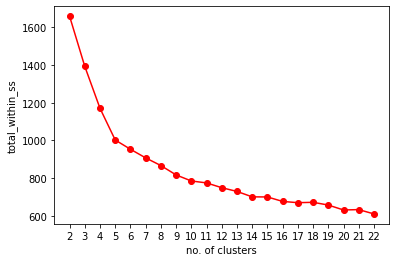

In [35]:
plt.plot(k,TWSS,'ro-');plt.xlabel("no. of clusters");plt.ylabel("total_within_ss");plt.xticks(k)

In [36]:
model=KMeans(n_clusters=8)

In [37]:
model

KMeans()

In [38]:
model.fit(def_norm)

KMeans()

In [39]:
model.labels_

array([5, 5, 5, ..., 1, 0, 0], dtype=int32)

In [40]:
df=pd.Series(model.labels_)

In [42]:
df.head(10)

0    5
1    5
2    5
3    5
4    3
5    5
6    4
7    2
8    1
9    1
dtype: int32

In [43]:
airline['clust']=df

In [44]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,5
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [45]:
airline.iloc[:,2:].groupby(airline.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,
0,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0,0
1,165.440860,3.406452,1.002151,1.002151,28857.582796,18.225806,507.296774,1.529032,4064.326882,1.0,1
2,359.831804,1.155963,1.030581,1.018349,8990.694190,10.788991,1021.440367,3.259939,6056.461774,1.0,2
3,242.932945,4.606414,1.000000,1.058309,68320.195335,22.880466,993.586006,2.973761,5946.784257,1.0,3
4,55.086093,3.708609,1.000000,1.026490,34089.261589,17.195364,220.172185,0.685430,6090.271523,0.0,4
5,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0,5
6,224.884393,1.156069,1.034682,1.000000,8717.800578,10.182081,1038.309249,3.043353,2715.592486,1.0,6
7,91.034810,3.465190,1.003165,1.018987,28799.360759,17.268987,227.854430,0.572785,2822.854430,0.0,7
